In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2

## Load and prepare dataset

In [216]:
data = pd.read_csv('./data/customerChurn.csv')
data = data.replace({"Int'l Plan":{'no':0, 'yes':1}, 'VMail Plan':{'no':0, 'yes':1}})

#select columns related to service only and drop others
data = data.drop(['Account Length','Area Code','Phone', 'State'], axis=1)

#sampling normal data in order to create balanced sample (churned vs not-churned) 
X_churn = data[data['Churn?']=='True.']
X_norm = data[data['Churn?']=='False.']
X_norm = X_norm.sample(n=X_churn.shape[0],axis=0)
X = pd.concat((X_churn,X_norm), axis=0)
del X_norm
del X_churn
y = X[['Churn?']]
y = y.replace({'True.':1, 'False.':0})


## Select and analyse 10 most discriminative feature using chi2 

In [217]:
X_ = X.drop(['Churn?'], axis=1)
cols = X.columns.values
ch2 = SelectKBest(chi2, k=10)
ch2.fit(X_,y)
pval_ = ch2.pvalues_
score_ = ch2.scores_
selected_feat = []
vals = []
for i,i1 in enumerate(ch2.get_support(indices=True)):
    selected_feat.append(cols[i1])
    vals.append([cols[i1], str(score_[i1]), str(pval_[i1])])

# print selected feature and their chi2 score and p-value
header = ["Feature", "chi2 score", "p-value"]
row_format ="{:<15}" * (len(header)+1)

print("               ===============================================")
print(row_format.format("", *header))
print("               ===============================================")
for row in vals:
    print(row_format.format("",*row))
print("               ===============================================")

               Feature        chi2 score     p-value        
               Int'l Plan     65.2366863905  6.64214157497e-16
               VMail Plan     15.8949771689  6.69561764913e-05
               VMail Message  394.757862595  7.62255713223e-88
               Day Mins       1447.27882819  0.0            
               Day Charge     246.044507961  1.89147083306e-55
               Eve Mins       161.877165218  4.40073102868e-37
               Eve Charge     13.7579443192  0.000207939535672
               Night Mins     24.4574426718  7.59694706101e-07
               Intl Mins      9.90789534083  0.00164571213586
               CustServ Calls 96.9139414802  7.2407041641e-23


## Plot categorical variabels

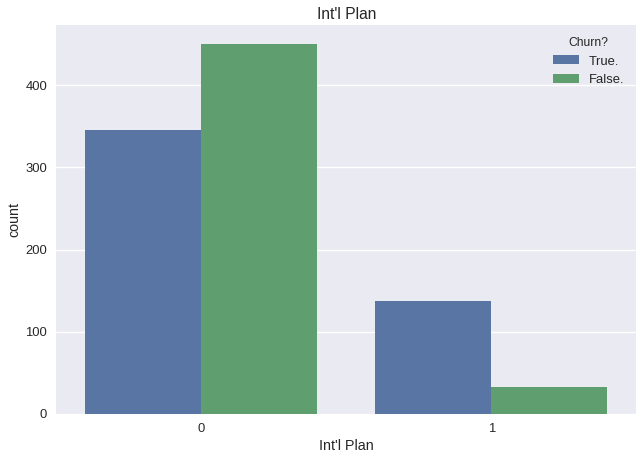

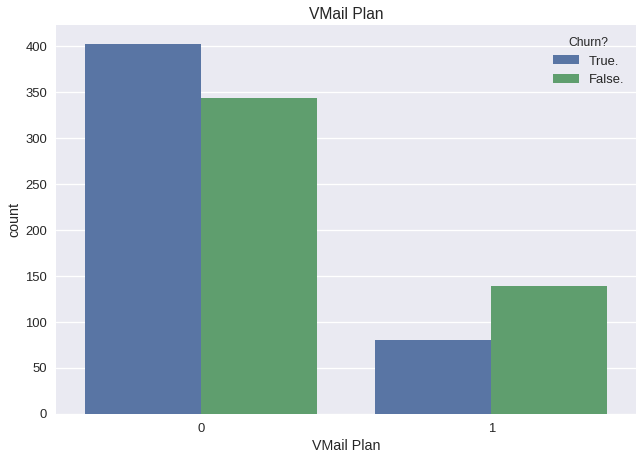

In [218]:
cols = ["Int'l Plan","VMail Plan"]
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5})
for c in cols:
    plt.figure()
    sns.countplot(x=c, hue="Churn?", data=X)
    plt.title(c)

## Plot Numerical Variabels 

In [189]:
num_feat = [f for f in selected_feat if f not in exclude_feat]
print(num_feat)

['VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Intl Mins', 'CustServ Calls']


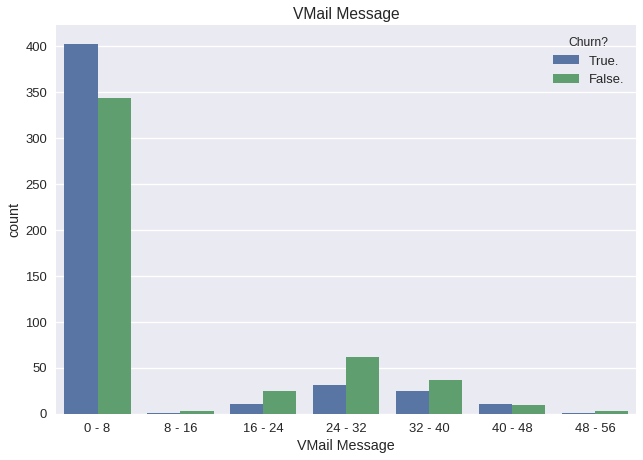

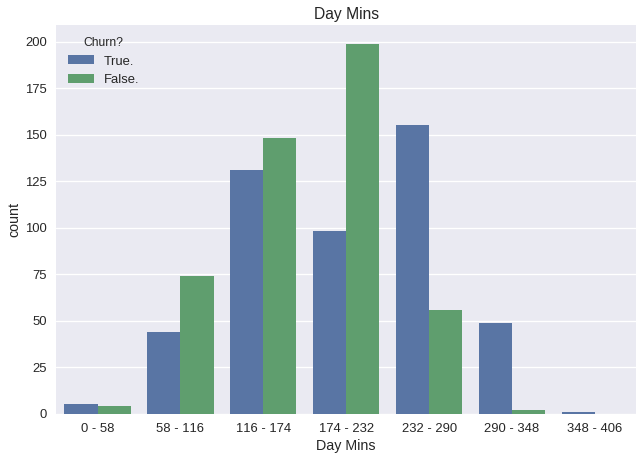

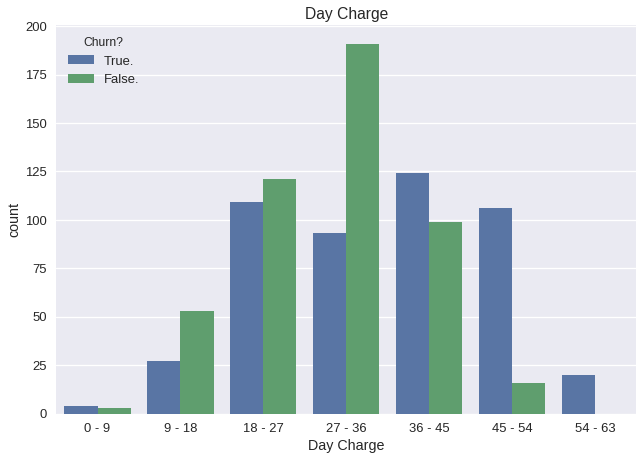

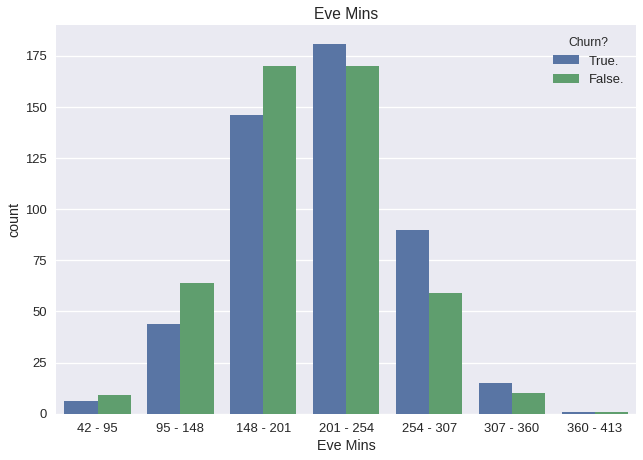

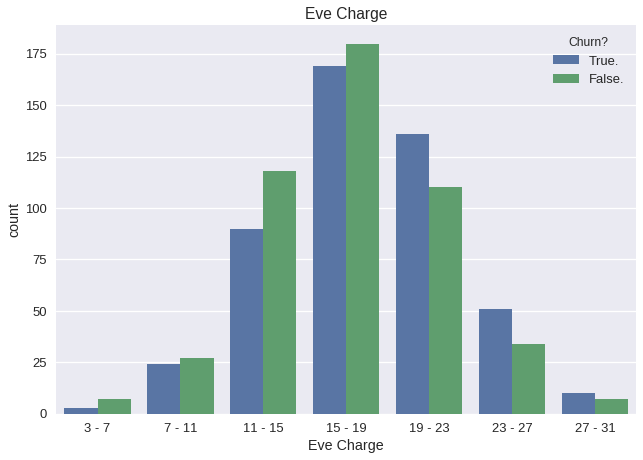

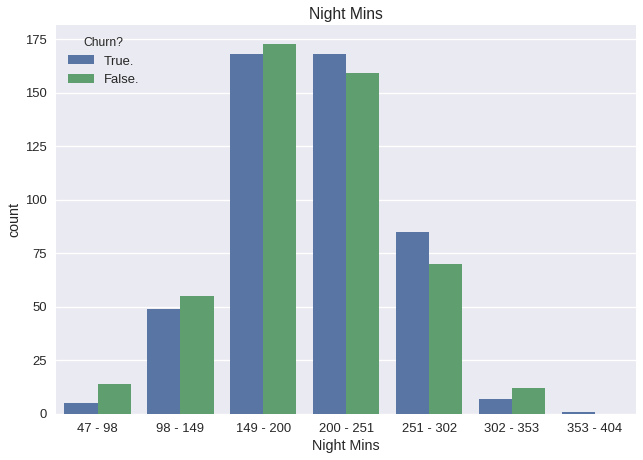

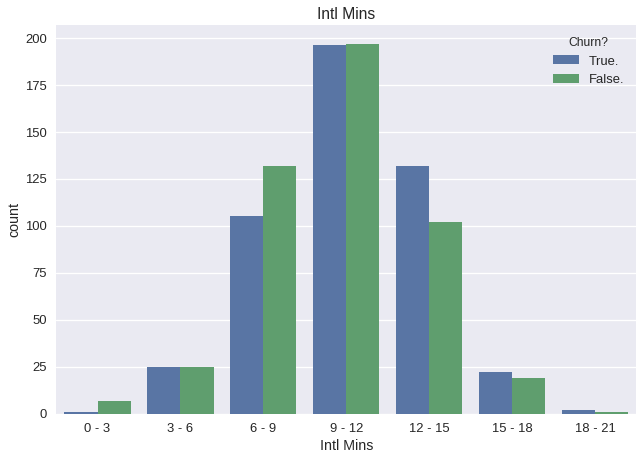

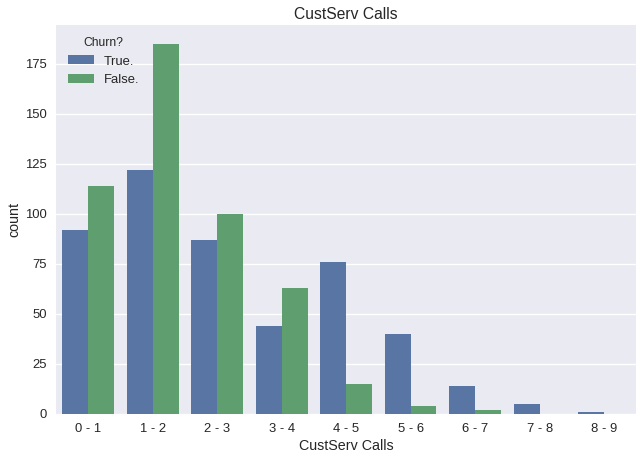

In [219]:
# Binning the numerical variables
exclude_feat = ["Int'l Plan", 'VMail Plan','Churn?']
cols_numeric = [f for f in selected_feat if f not in exclude_feat]
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5})
for c in cols_numeric:
    temp = X[c]
    min_ = int(temp.min())
    max_ = int(temp.max())
    range_ = int((max_-min_)/6)
    bins_ = range(min_, max_+range_, range_)
    labels = [ "{0} - {1}".format(i, i + range_) for i in range(min_, max_, range_) ]
    X[c] = pd.cut(X[c], bins_, right=False, labels=labels)
    plt.figure()
    sns.countplot(x=c, hue="Churn?", data=X)
    plt.title(c)

## Analysis 

According to features from dataset sample, the countplot diagram shows that:
1. The the number of churned customer higher in customer with Int'l Plan and Int'l Mins greater than 12. It might be worthy to analyse the Int'l Plan service into further (in term of quality and cost).
2. The the number of churned customer higher in customer without Voice Mail Plan and the number of VoiceMail Message less than 8.
3. The the number of churned customer higher in customer with Day Min higher than 232 and Day Charge more than 36
4. The the number of churned customer higher in customer with Eve Min higher than 254 and Eve Charge more than 19
5. The the number of churned customer higher in customer who calls Customer Service more than 4 times.

In general, it seems that the number of churned customer higher when they use more service (pay higher?). In order to prevent churned customer, probably it would be worthy to consider discount price for them and when they call Customer Service more than 3, they can be handled by 'special' Customer Service.   